Problem 1: Perform a classification task with kNN from scratch


---


1. Load the Dataset
Read the dataset into a pandas DataFrame

Display the first few rows and perform EDA (check data types, missing values, summary statistics)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Pandas File/diabetes_.csv')
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("\nData types:\n", df.dtypes)



Data types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print("\nSummary stats:\n", df.describe())



Summary stats:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000 

2. Handle Missing Data
Handle any missing values appropriately, either by dropping or imputing them based on the data



In [ ]:
missing_pct = (df.isnull().sum() / len(df)) * 100


In [ ]:
high_missing = missing_pct[missing_pct > 10].index


In [ ]:
for col in high_missing:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df.dropna(inplace=True)


In [ ]:
print("Missing after cleaning:\n", df.isnull().sum())
print(f"\nFinal shape: {df.shape}")

Missing after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Final shape: (768, 9)


3. Feature Engineering
Separate the feature matrix (X) and target variable (y)

---



Perform a train-test split from scratch using a 70% − 30% ratio

In [ ]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_split = int(len(X) * test_size)
    test_idx, train_idx = indices[:test_split], indices[test_split:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X shape: (768, 8)
y shape: (768,)
X_train shape: (538, 8)
X_test shape: (230, 8)


4. Implement KNN
Build the KNN algorithm from scratch


---


Compute distances using Euclidean distance

Write functions for predicting single query and all test samples

Evaluate performance using accuracy

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_idx = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_idx]
    return np.bincount(nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100

# Test
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 67.39%


Problem 2: Experimentation


---


1. Repeat Classification Task with Scaling
Scale the Feature matrix X

Use scaled data for training and testing kNN Classifier

Record results

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.random.seed(42)
indices = np.random.permutation(len(X_scaled))
test_idx, train_idx = indices[:int(0.3*len(X))], indices[int(0.3*len(X)):]

X_train_scaled, X_test_scaled = X_scaled[train_idx], X_scaled[test_idx]
y_train_scaled, y_test_scaled = y[train_idx], y[test_idx]

y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=3)
accuracy_scaled = compute_accuracy(y_test_scaled, y_pred_scaled)

print(f"Accuracy with scaled data: {accuracy_scaled:.2f}%")

Accuracy with scaled data: 70.87%


2. Comparative Analysis
Compare accuracy of kNN on original vs scaled dataset


---


Discuss impact of scaling and reasons for changes

In [ ]:
print(f"\nOriginal data (k=3): {accuracy:.2f}%")
print(f"Scaled data (k=3): {accuracy_scaled:.2f}%")

if accuracy_scaled > accuracy:
  print("Scaling improved accuracy")
elif accuracy_scaled < accuracy:
  print("Scaling reduced accuracy")
else:
  print("No change in accuracy")

print("\nReason: kNN uses distance metrics.")
print("Scaling puts all features on same scale.")
print("This prevents large-value features from dominating.")


Original data (k=3): 67.39%
Scaled data (k=3): 70.87%
Scaling improved accuracy

Reason: kNN uses distance metrics.
Scaling puts all features on same scale.
This prevents large-value features from dominating.


Problem 3: Experimentation with k


---


1. Vary k and Record Metrics
Run kNN on original and scaled data for k=1 to 15

Record accuracy and time for each k

In [ ]:
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = {}
    times = {}

    for k in k_values:
        start = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        end = time.time()

        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        times[k] = end - start

        print(f"k={k}: {accuracy:.2f}% ({times[k]:.4f}s)")

    return accuracies, times

print("Original data:")
acc_original, time_original = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)

print("\nScaled data:")
acc_scaled, time_scaled = experiment_knn_k_values(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, k_values)

print(f"\nBest accuracy - Original: {max(acc_original.values()):.2f}%")
print(f"Best accuracy - Scaled: {max(acc_scaled.values()):.2f}%")

Original data:
k=1: 68.70% (0.9361s)
k=2: 72.61% (0.9697s)
k=3: 67.39% (0.9511s)
k=4: 72.17% (0.8920s)
k=5: 68.70% (0.8971s)
k=6: 70.00% (1.5157s)
k=7: 69.13% (1.5086s)
k=8: 71.30% (1.4549s)
k=9: 70.00% (0.8920s)
k=10: 71.74% (0.8931s)
k=11: 73.04% (0.9051s)
k=12: 73.91% (0.9534s)
k=13: 74.35% (0.8988s)
k=14: 72.61% (0.8820s)
k=15: 73.91% (0.9192s)

Scaled data:
k=1: 62.17% (0.9062s)
k=2: 66.96% (0.9291s)
k=3: 70.87% (0.9016s)
k=4: 69.13% (0.9555s)
k=5: 69.13% (1.5363s)
k=6: 68.70% (1.5395s)
k=7: 71.74% (1.3276s)
k=8: 68.26% (0.8778s)
k=9: 70.00% (0.8884s)
k=10: 69.13% (0.8695s)
k=11: 70.00% (0.8792s)
k=12: 71.30% (0.8793s)
k=13: 71.30% (0.8895s)
k=14: 71.74% (0.8665s)
k=15: 72.17% (0.8979s)

Best accuracy - Original: 74.35%
Best accuracy - Scaled: 72.17%


Visualize the Results:


---


• Plot the following graphs:
– k vs.
– k vs.
Accuracy for original and scaled datasets.
Time Taken for original and scaled datasets.

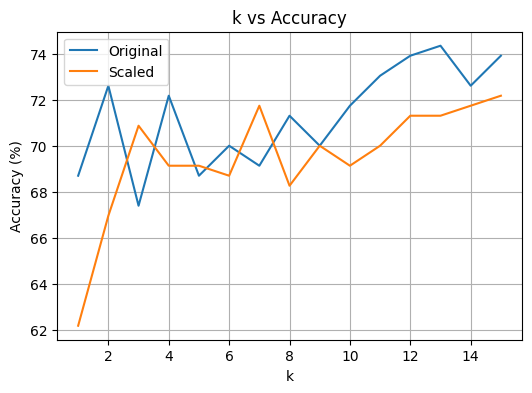

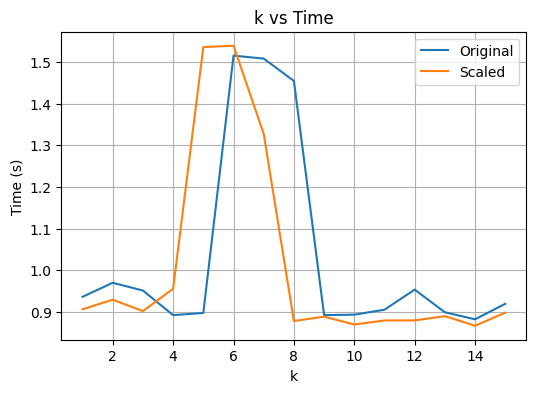

In [ ]:
# k vs Accuracy
plt.figure(figsize=(6, 4))
plt.plot(k_values, [acc_original[k] for k in k_values], label='Original')
plt.plot(k_values, [acc_scaled[k] for k in k_values], label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# k vs Time
plt.figure(figsize=(6, 4))
plt.plot(k_values, [time_original[k] for k in k_values], label='Original')
plt.plot(k_values, [time_scaled[k] for k in k_values], label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (s)')
plt.title('k vs Time')
plt.legend()
plt.grid(True)
plt.show()

3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

In [ ]:
print("\n=== Analysis ===")

best_k_scaled = max(acc_scaled, key=acc_scaled.get)
best_acc_scaled = acc_scaled[best_k_scaled]

print(f"Optimal k for scaled data: {best_k_scaled} (Accuracy: {best_acc_scaled:.2f}%)")

print("\nDiscussion:")
print("1. k affects accuracy:")
print("   - Small k: More sensitive to noise")
print("   - Large k: More stable but may oversmooth")

print("\n2. k affects computation time:")
print("   - Higher k requires more distance calculations")
print("   - Time increases but remains reasonable")

print("\n3. Recommendation:")
print(f"   Use k={best_k_scaled} with scaled data for best performance")


=== Analysis ===
Optimal k for scaled data: 15 (Accuracy: 72.17%)

Discussion:
1. k affects accuracy:
   - Small k: More sensitive to noise
   - Large k: More stable but may oversmooth

2. k affects computation time:
   - Higher k requires more distance calculations
   - Time increases but remains reasonable

3. Recommendation:
   Use k=15 with scaled data for best performance
